# Análise Exploratória de Dados ENEM 2019
# 1) Introdução

In [1]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn-colorblind')

In [4]:
#Verificar quais arquivos estão presentes no ZIP e escolher o banco de dados .csv para trabalhar
with zipfile.ZipFile('../ProjetoFinal/microdados_enem_2019.zip') as z:
    print(*z.namelist(),sep="\n")

LEIA-ME E DOCUMENTOS TÉCNICOS/
LEIA-ME E DOCUMENTOS TÉCNICOS/matriz_referencia_enem.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/Leia_Me_Enem_2019.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/manual_de_redacao_do_enem_2019.pdf
LEIA-ME E DOCUMENTOS TÉCNICOS/Edital_enem_2019.pdf
PROVAS E GABARITOS/
PROVAS E GABARITOS/ENEM_2019_P1_CAD_02_DIA_1_AMARELO.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_02_DIA_1_AMARELO_AMPLIADA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_02_DIA_1_AMARELO_SUPERAMPLIADA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_03_DIA_1_BRANCO.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_04_DIA_1_ROSA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_09_DIA_1_LARANJA_LEDOR.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_10_DIA_1_VERDE_LIBRAS.pdf
PROVAS E GABARITOS/ENEM_2019_P1_CAD_05_DIA_2_AMARELO.pdf
PROVAS E GABARITOS/ENEM_2019_P1_GAB_02_DIA_1_AMARELO.pdf.pdf
PROVAS E GABARITOS/ENEM_2019_P1_GAB_02_DIA_1_AMARELO_AMPLIADA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_GAB_02_DIA_1_AMARELO_SUPERAMPLIADA.pdf
PROVAS E GABARITOS/ENEM_2019_P1_GAB_03_D

In [5]:
#ler os arquivos de microdados ENEM 2019
with zipfile.ZipFile('../ProjetoFinal/microdados_enem_2019.zip') as z:
    with z.open('DADOS/MICRODADOS_ENEM_2019.csv') as d:
        dadosEnem = pd.read_csv(d,sep=';',encoding='ISO-8859-1')

In [5]:
#vizualizar as primeiras linhas da tabela
dadosEnem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595656,2019,3552205,Sorocaba,35,SP,36.0,M,1,3,...,A,A,A,A,A,A,C,A,C,B
1,190001421546,2019,2910800,Feira de Santana,29,BA,23.0,M,1,1,...,A,A,A,B,A,A,E,A,A,B
2,190001133210,2019,2304400,Fortaleza,23,CE,39.0,F,1,3,...,A,A,A,B,A,A,C,A,A,B
3,190001199383,2019,1721000,Palmas,17,TO,25.0,F,1,1,...,A,A,A,C,A,B,D,A,B,B
4,190001237802,2019,3118601,Contagem,31,MG,22.0,F,1,1,...,B,A,A,B,A,A,C,B,B,B


In [11]:
#vizualizar todas colunas disponíveis
dadosEnem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [6]:
#Selecionar dados relevantes
dadosRelevantes = dadosEnem[['SG_UF_RESIDENCIA','NU_IDADE','TP_SEXO','TP_COR_RACA','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT','NU_NOTA_REDACAO','TP_ESCOLA','Q025','Q006','Q002', 'TP_PRESENCA_CH', 'TP_PRESENCA_MT']]
dadosRelevantes.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_ESCOLA,Q025,Q006,Q002,TP_PRESENCA_CH,TP_PRESENCA_MT
0,SP,36.0,M,3,NaN,NaN,NaN,NaN,NaN,1,B,A,B,0,0
1,BA,23.0,M,1,NaN,NaN,NaN,NaN,NaN,1,B,C,E,0,0
2,CE,39.0,F,3,NaN,NaN,NaN,NaN,NaN,1,B,B,E,0,0
3,TO,25.0,F,1,483.8,503.6,537.3,392.0,460.0,1,B,E,E,1,1
4,MG,22.0,F,1,513.6,575.5,570.7,677.0,860.0,1,B,G,E,1,1


In [14]:
#salvar esta tabela com apenas dados relevantes em um arquivo csv
dadosRelevantes.to_csv('dados_relevantes.csv')

In [3]:
#ler o arquivo e trabalhar com ele de agora em diante pois é mais leve que o orignal
maindata=pd.read_csv('dados_relevantes.csv')

In [16]:
#coferir se a tabela está correta
maindata.head()

,Unnamed: 0,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_ESCOLA,Q025,Q006,Q002,TP_PRESENCA_CH,TP_PRESENCA_MT
0,0,SP,36.0,M,3,NaN,NaN,NaN,NaN,NaN,1,B,A,B,0,0
1,1,BA,23.0,M,1,NaN,NaN,NaN,NaN,NaN,1,B,C,E,0,0
2,2,CE,39.0,F,3,NaN,NaN,NaN,NaN,NaN,1,B,B,E,0,0
3,3,TO,25.0,F,1,483.8,503.6,537.3,392.0,460.0,1,B,E,E,1,1
4,4,MG,22.0,F,1,513.6,575.5,570.7,677.0,860.0,1,B,G,E,1,1


# 2) Análise Geral dos Dados

Conhecendo a Natureza das varáveis

In [6]:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*50)
    print('FEATURE DATA TYPES: ')
    print(data.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(data.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(data.isnull().sum())
    
show_info(maindata)

DATASET SHAPE:  (5095270, 16) 

--------------------------------------------------
FEATURE DATA TYPES: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095270 entries, 0 to 5095269
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unnamed: 0        int64  
 1   SG_UF_RESIDENCIA  object 
 2   NU_IDADE          float64
 3   TP_SEXO           object 
 4   TP_COR_RACA       int64  
 5   NU_NOTA_CN        float64
 6   NU_NOTA_CH        float64
 7   NU_NOTA_LC        float64
 8   NU_NOTA_MT        float64
 9   NU_NOTA_REDACAO   float64
 10  TP_ESCOLA         int64  
 11  Q025              object 
 12  Q006              object 
 13  Q002              object 
 14  TP_PRESENCA_CH    int64  
 15  TP_PRESENCA_MT    int64  
dtypes: float64(6), int64(5), object(5)
memory usage: 622.0+ MB
None

 --------------------------------------------------
NUMBER OF UNIQUE VALUES PER FEATURE: 

Unnamed: 0          5095270
SG_UF_RESIDENCIA         27
NU_IDADE

In [14]:
#Quantas pessoas fizeram a inscrição da prova
inscricoes = len(maindata)
print ('O ENEM 2019 recebeu '+ str(inscricoes) +' inscrições')

O ENEM 2019 recebeu 5095270 inscrições


In [4]:
#Atribuindo legendas as variaveis

maindata['TP_COR_RACA'] = maindata['TP_COR_RACA'].map({0:'NA', 6:'NA', 1:'Branca', 2:'Preta', 3:'Parda',4:'Amarela', 5:'Indígena'})

#Possui internet em casa?
maindata['Q025'] = maindata['Q025'].map({'A':'Não', 'B':'Sim'})

#Escolaridade da mãe
maindata['Q002'] = maindata['Q002'].map({'A':'Nunca estudou', 'B':'Não completou EF', 'C':'Não completou EF',
                                'D':'Não completou EM', 'E':'Não completou ES', 'F':'Graduada',
                                'G':'Pós-graduada','H':'Não sabe'})

#Renda familiar (incluindo a do aluno)
maindata['Q006'] = maindata['Q006'].map({'A':'Nenhuma renda', 'B':'Até 1.320', 'C':'Até 1.320',
                                 'D':'Até 3.520', 'E':'Até 3.520', 'F':'Até 3.520', 'G':'Até 3.520',
                                 'H':'Até 10.560','I':'Até 10.560', 'J':'Até 10.560','K':'Até 10.560',
                                 'L':'Até 10.560','M':'Até 10.560','N':'Até 10.560',
                                 'O':'Mais de 10.560','P':'Mais de 10.560','Q':'Mais de 10.560'})

#Tipo de escola
maindata['TP_ESCOLA'] = maindata['TP_ESCOLA'].map({1:'Não respondeu', 2:'Pública', 3:'Privada', 4:'Exterior'})

#Presença na prova de Ciencias Humanas
maindata['TP_PRESENCA_CH'] = maindata['TP_PRESENCA_CH'].map({0:'Faltou à prova', 1:'Presente na prova', 2:'Eliminado na prova'})

#Presença na prova de Matematica
maindata['TP_PRESENCA_MT'] = maindata['TP_PRESENCA_MT'].map({0:'Faltou à prova', 1:'Presente na prova', 2:'Eliminado na prova'})


In [29]:
# No primeiro dia são aplicadas provas Redação, Ciências Humanas e Linguagens e Codigos
#Por isso, é necessário ler apenas os dados de uma das matérias citadas, no caso CH

print('Porcentagem de Pessoas no 1º dia ENEM 2019 ')
maindata['TP_PRESENCA_CH'].value_counts(normalize=True)

Porcentagem de Pessoas no 1º dia ENEM 2019 


Presente na prova     0.769958
Faltou à prova        0.229243
Eliminado na prova    0.000799
Name: TP_PRESENCA_CH, dtype: float64

In [30]:
#No segundo dia são aplicadas provas Matematica e Ciências da Natureza
#Por isso, é necessário ler apenas os dados de uma das matérias citadas, no caso MT

print('Porcentagem de Pessoas 2º dia ENEM 2019')
maindata['TP_PRESENCA_MT'].value_counts(normalize=True)

Porcentagem de Pessoas 2º dia ENEM 2019


Presente na prova     0.728211
Faltou à prova        0.271413
Eliminado na prova    0.000375
Name: TP_PRESENCA_MT, dtype: float64

In [17]:
#Porcentagem de genero na amostra
maindata['TP_SEXO'].value_counts(normalize=True)

F    0.595027
M    0.404973
Name: TP_SEXO, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


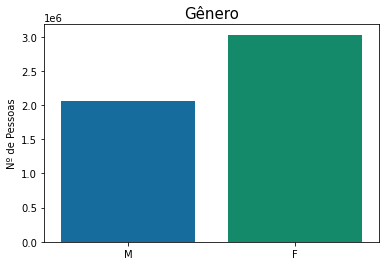

In [4]:
#Grafico genero x nº de pessoas
sns.countplot(maindata['TP_SEXO'], orient='h')
plt.title('Gênero', size=15)
plt.xlabel("")
plt.ylabel("Nº de Pessoas")
plt.show()

In [144]:
#Nº de pessoas por estado

print('Nº de pessoas por estado')
maindata['SG_UF_RESIDENCIA'].value_counts()

Nº de pessoas por estado


SP    813772
MG    538896
BA    398095
RJ    338710
CE    295870
PA    281518
PE    271727
MA    219673
RS    218763
PR    210080
GO    170147
PB    147780
PI    121181
RN    119179
AM    118087
SC    109515
ES    102435
DF     94352
AL     91707
MT     88349
SE     75895
MS     70157
RO     58885
TO     47181
AP     42140
AC     38229
RR     12947
Name: SG_UF_RESIDENCIA, dtype: int64

In [20]:
#Porcentagem de pessoas por estado

print('Nº de pessoas por estado')
maindata['SG_UF_RESIDENCIA'].value_counts(normalize=True)

Nº de pessoas por estado


SP    0.159711
MG    0.105764
BA    0.078130
RJ    0.066475
CE    0.058068
PA    0.055251
PE    0.053329
MA    0.043113
RS    0.042935
PR    0.041230
GO    0.033393
PB    0.029003
PI    0.023783
RN    0.023390
AM    0.023176
SC    0.021493
ES    0.020104
DF    0.018518
AL    0.017998
MT    0.017339
SE    0.014895
MS    0.013769
RO    0.011557
TO    0.009260
AP    0.008270
AC    0.007503
RR    0.002541
Name: SG_UF_RESIDENCIA, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


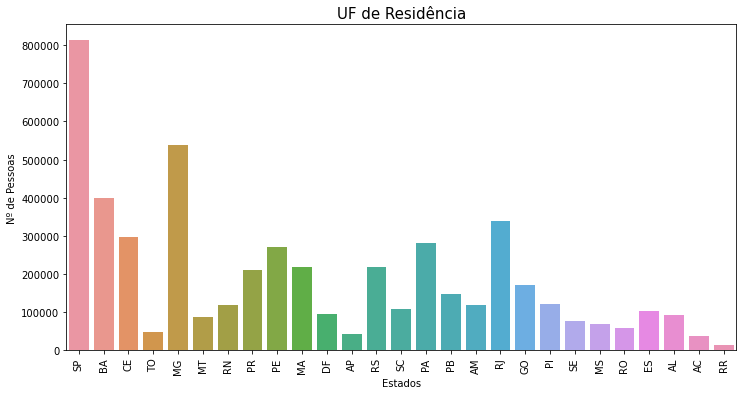

In [5]:
# Gráfico nº de pessoas por estado
plt.figure( figsize=(12, 6))
sns.countplot(maindata['SG_UF_RESIDENCIA'], orient='h')
plt.title('UF de Residência', size=15)
plt.xticks(rotation=90)
plt.xlabel("Estados")
plt.ylabel("Nº de Pessoas")
plt.show()

In [11]:
#Nº de pessoas por raça
print("Nº de pessoas por raça:")
maindata['TP_COR_RACA'].value_counts()

Nº de pessoas por raça:


Parda       2364063
Branca      1831779
Preta        648309
Amarela      116162
NA           103201
Indígena      31756
Name: TP_COR_RACA, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


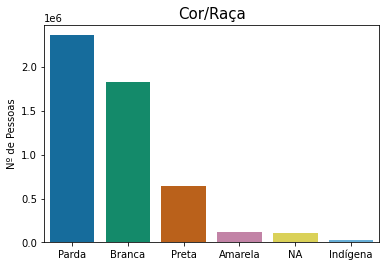

In [8]:
#Grafico quantidade de pessoas por raça
sns.countplot(maindata['TP_COR_RACA'], orient='h')
plt.title('Cor/Raça', size=15)
plt.xlabel("")
plt.ylabel("Nº de Pessoas")
plt.show()

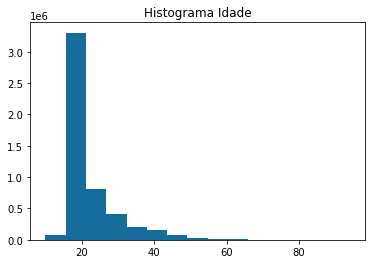

In [28]:
#Histograma Idade
plt.hist(maindata['NU_IDADE'],bins=15, histtype='bar', color='#166C9C')
plt.title('Histograma Idade')
plt.show()

In [156]:
#Quantidade de pessoas por tipo de Escola 
print("Tipos de Escola")
maindata['TP_ESCOLA'].value_counts()

Tipos de Escola


Não respondeu    3629376
Pública          1247262
Privada           218632
Name: TP_ESCOLA, dtype: int64

In [10]:
#Porcentagem de pessoas por tipo de Escola 
print("Tipos de Escola")
maindata['TP_ESCOLA'].value_counts(normalize=True)

Tipos de Escola


Não respondeu    0.712303
Pública          0.244788
Privada          0.042909
Name: TP_ESCOLA, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


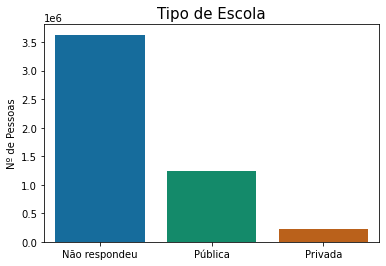

In [157]:
#Grafico quantidade de pessoas por escola
sns.countplot(maindata['TP_ESCOLA'], orient='h')
plt.title('Tipo de Escola', size=15)
plt.xlabel("")
plt.ylabel("Nº de Pessoas")
plt.show()

In [13]:
#Porcemtagem de pessoas que possui internet em casa
print("Nº de pessoas que possui internet em casa")
maindata['Q025'].value_counts(normalize=True)

Nº de pessoas que possui internet em casa


Sim    0.776172
Não    0.223828
Name: Q025, dtype: float64

In [15]:
#nº de pessoas de acordo com a escolaridade da mãe
print("Nº de alunos de acordo com\n a escolaridade da mãe:")
maindata['Q002'].value_counts()

Nº de alunos de acordo com
 a escolaridade da mãe:


Não completou ES    1633692
Não completou EF    1541024
Não completou EM     667415
Graduada             513711
Pós-graduada         399470
Nunca estudou        194625
Não sabe             145333
Name: Q002, dtype: int64

In [14]:
#Escolaridade da mãe porcentagem
print("Porcentagem de alunos de acordo com a escolaridade da mãe:")
maindata['Q002'].value_counts(normalize=True)

Porcentagem de alunos de acordo com a escolaridade da mãe:


Não completou ES    0.320629
Não completou EF    0.302442
Não completou EM    0.130987
Graduada            0.100821
Pós-graduada        0.078400
Nunca estudou       0.038197
Não sabe            0.028523
Name: Q002, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


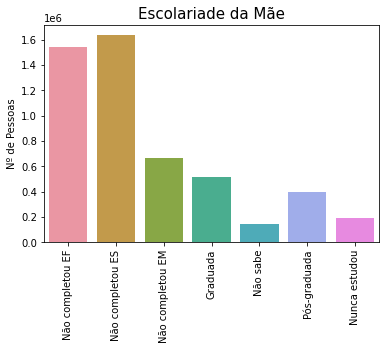

In [11]:
#grafico de escolaridade da mãe por numero de pessoas
sns.countplot(maindata['Q002'], orient='h')
plt.title('Escolariade da Mãe', size=15)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Nº de Pessoas")
plt.show()

In [39]:
#Porcentagem de pessoas por renda da familiar
print('Nº de alunos por renda familiar:')
maindata['Q006'].value_counts(normalize=True)

Nº de alunos por renda familiar:


Até 1.320         0.507277
Até 3.520         0.295050
Até 10.560        0.122568
Nenhuma renda     0.045547
Mais de 10.560    0.029558
Name: Q006, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


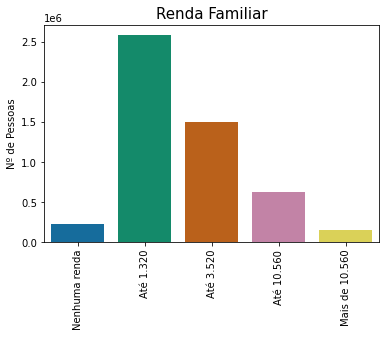

In [166]:
#Grafico Renda familiar
sns.countplot(maindata['Q006'], orient='h')
plt.title('Renda Familiar', size=15)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Nº de Pessoas")
plt.show()

# Relação entre variáveis qualitativas

Legendas:
Q025:Acesso à Internet


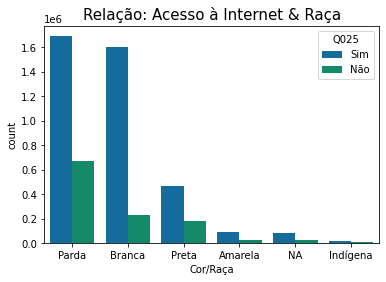

In [90]:
# Relação do acesso a internet e raça
sns.countplot(x="TP_COR_RACA", hue="Q025", data=maindata)
plt.title('Relação: Acesso à Internet & Raça',size=15)
plt.xlabel("Cor/Raça")
print('Legendas:\nQ025:Acesso à Internet')

Legendas:
Q025:Acesso à Internet


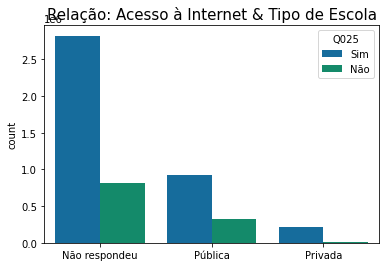

In [10]:
#Relação acesso a internet e tipo de escola 
sns.countplot(x="TP_ESCOLA", hue="Q025", data=maindata)
plt.title('Relação: Acesso à Internet & Tipo de Escola',size=15)
plt.xlabel("")
print('Legendas:\nQ025:Acesso à Internet')

Legendas:
Q025:Acesso à Internet


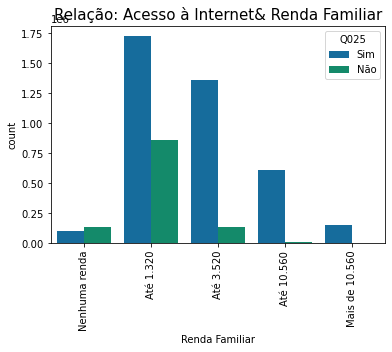

In [34]:
#Relação acesso a internet e renda familiar
sns.countplot(x="Q006", hue="Q025", data=maindata)
plt.xticks(rotation=90)
plt.title('Relação: Acesso à Internet& Renda Familiar',size=15)
plt.xlabel("Renda Familiar")
print('Legendas:\nQ025:Acesso à Internet')

Text(0.5, 0, 'Renda Familiar')

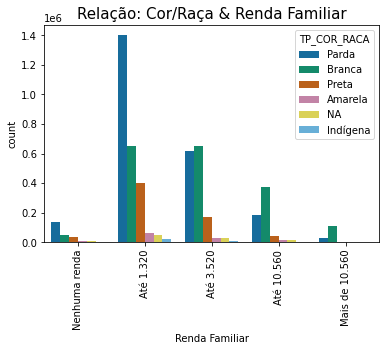

In [35]:
#Relação acesso a internet e renda familiar
sns.countplot(x="Q006", hue="TP_COR_RACA", data=maindata)
plt.xticks(rotation=90)
plt.title('Relação: Cor/Raça & Renda Familiar',size=15)
plt.xlabel("Renda Familiar")


Legendas:
Q002:Escolaridade da Mãe


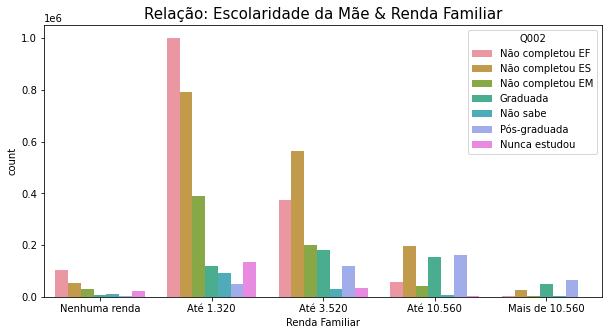

In [109]:
#Relação escolaridade da mãe e renda familiar
plt.figure( figsize=(10, 5))
sns.countplot(x="Q006", hue="Q002", data=maindata)
plt.title('Relação: Escolaridade da Mãe & Renda Familiar',size=15)
plt.xlabel("Renda Familiar")
print('Legendas:\nQ002:Escolaridade da Mãe')

Legendas: 
Q006:Renda Familiar


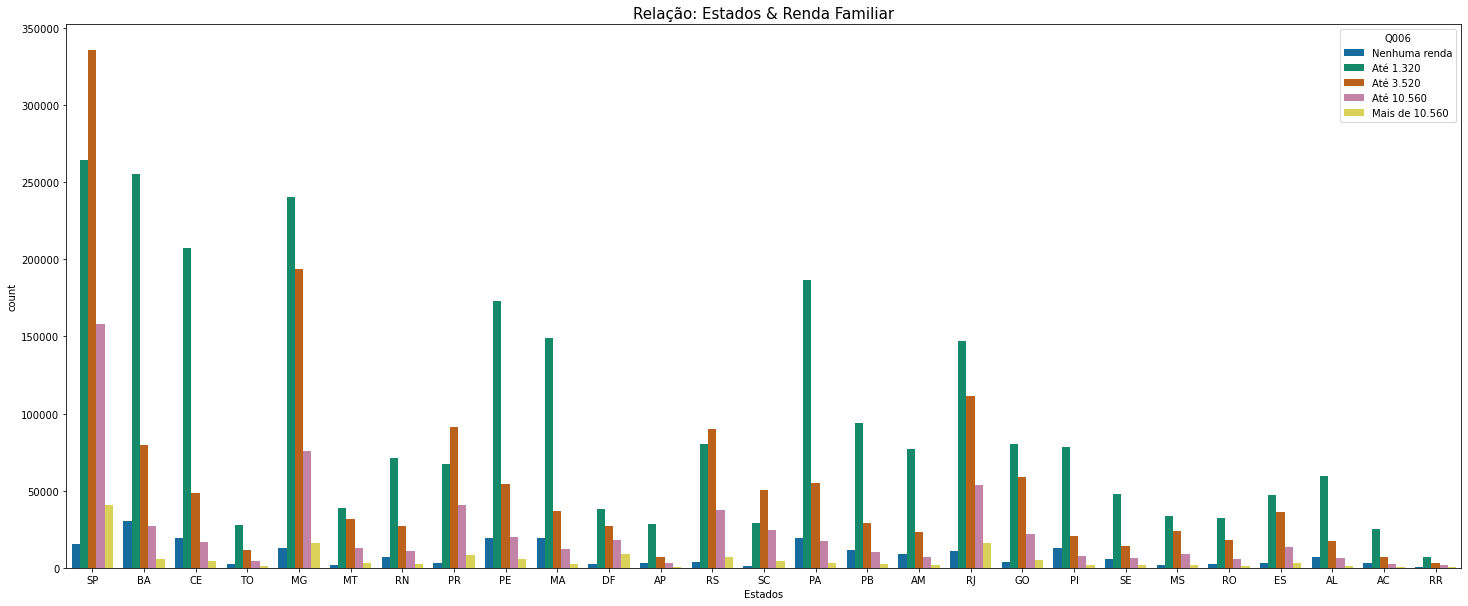

In [108]:
#Relação Estado e renda familiar
plt.figure( figsize=(25, 10))
sns.countplot(x="SG_UF_RESIDENCIA", hue="Q006", data=maindata)
plt.title('Relação: Estados & Renda Familiar',size=15)
plt.xlabel("Estados")
print('Legendas: \nQ006:Renda Familiar')

Legendas: 
Q006:Renda Familiar


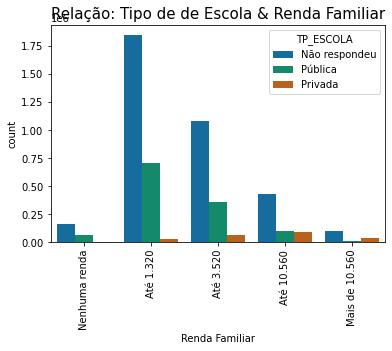

In [83]:
#Relação escolaridade da mãe e renda familiar
sns.countplot(x="Q006", hue="TP_ESCOLA", data=maindata)
plt.title('Relação: Tipo de de Escola & Renda Familiar',size=15)
plt.xticks(rotation=90)
plt.xlabel("Renda Familiar")

# Relação entre variáveis qualitativas e quantitativas

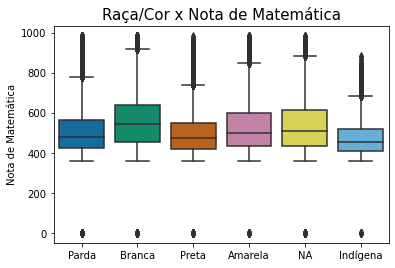

In [99]:
sns.boxplot(x=maindata['TP_COR_RACA'], y=maindata['NU_NOTA_MT'])
plt.title('Raça/Cor x Nota de Matemática',size=15)
plt.xlabel("")
plt.ylabel("Nota de Matemática")
plt.show()

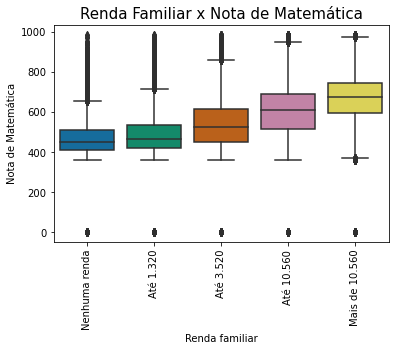

In [100]:
sns.boxplot(x=maindata['Q006'], y=maindata['NU_NOTA_MT'])
plt.title('Renda Familiar x Nota de Matemática',size=15)
plt.xticks(rotation=90)
plt.xlabel("Renda familiar")
plt.ylabel("Nota de Matemática")
plt.show()

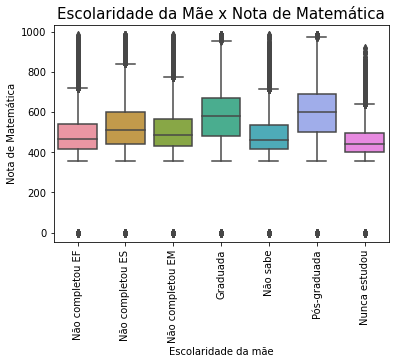

In [101]:
sns.boxplot(x=maindata['Q002'], y=maindata['NU_NOTA_MT'])
plt.title('Escolaridade da Mãe x Nota de Matemática',size=15)
plt.xticks(rotation=90)
plt.xlabel("Escolaridade da mãe")
plt.ylabel("Nota de Matemática")
plt.show()

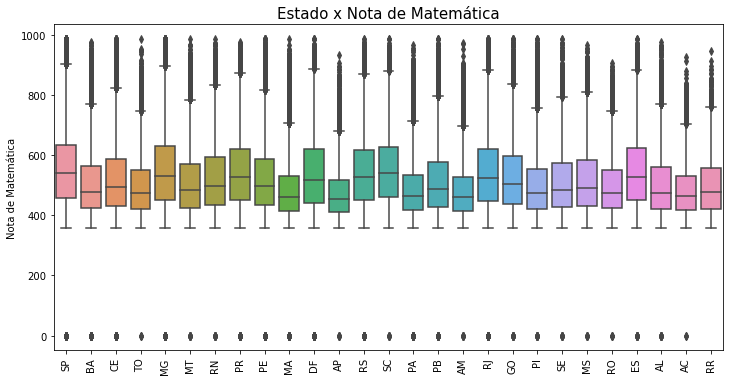

In [106]:
plt.figure( figsize=(12, 6))
sns.boxplot(x=maindata['SG_UF_RESIDENCIA'], y=maindata['NU_NOTA_MT'])
plt.title('Estado x Nota de Matemática',size=15)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Nota de Matemática")
plt.show()

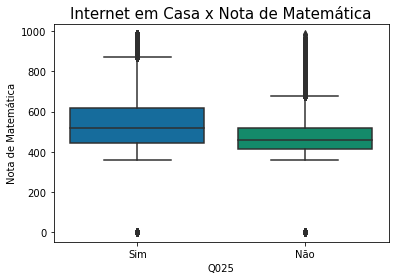

In [110]:
sns.boxplot(x=maindata['Q025'], y=maindata['NU_NOTA_MT'])
plt.title('Internet em Casa x Nota de Matemática',size=15)
plt.ylabel("Nota de Matemática")
plt.show()

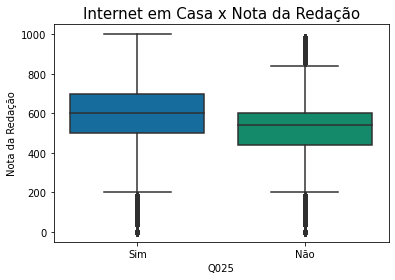

In [7]:
sns.boxplot(x=maindata['Q025'], y=maindata['NU_NOTA_REDACAO'])
plt.title('Internet em Casa x Nota da Redação',size=15)
plt.ylabel("Nota da Redação")
plt.show()

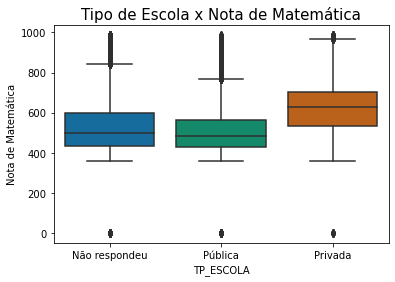

In [111]:
sns.boxplot(x=maindata['TP_ESCOLA'], y=maindata['NU_NOTA_MT'])
plt.title('Tipo de Escola x Nota de Matemática',size=15)
plt.ylabel("Nota de Matemática")
plt.show()

# Relação entre variáveis quantitativas

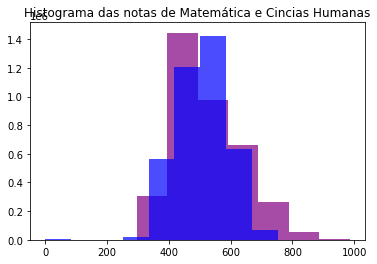

Legendas:
 Notas de Matemática: Roxo
 Notas de Ciências Humanas: Azul


In [40]:
plt.hist(maindata['NU_NOTA_MT'], alpha=0.7, color='purple')
plt.hist(maindata['NU_NOTA_CH'], alpha=0.7, color='blue')
plt.title('Histograma das notas de Matemática e Cincias Humanas')
plt.show()
print('Legendas:\n Notas de Matemática: Roxo\n Notas de Ciências Humanas: Azul')

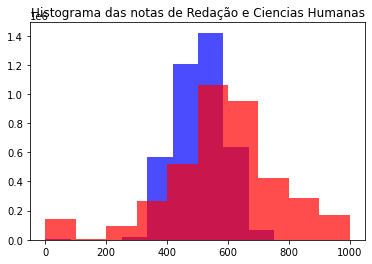

In [11]:
plt.hist(maindata['NU_NOTA_CH'], alpha=0.7, color='blue')
plt.hist(maindata['NU_NOTA_REDACAO'], alpha=0.7, color='red')
plt.title('Histograma das notas de Redação e Ciencias Humanas')
plt.show()

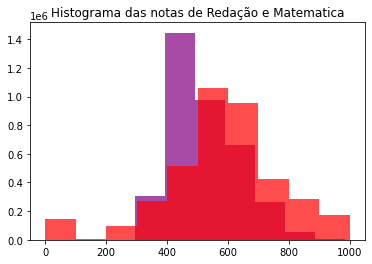

In [12]:
plt.hist(maindata['NU_NOTA_MT'], alpha=0.7, color='purple')
plt.hist(maindata['NU_NOTA_REDACAO'], alpha=0.7, color='red')
plt.title('Histograma das notas de Redação e Matematica')
plt.show()

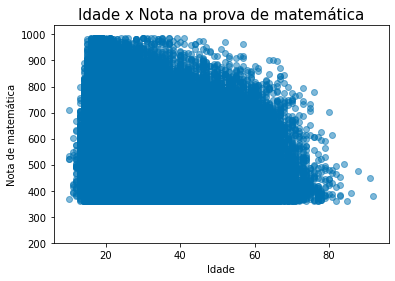

In [115]:
plt.scatter(maindata['NU_IDADE'], maindata['NU_NOTA_MT'], alpha=0.5)
plt.title("Idade x Nota na prova de matemática", size=15)
plt.xlabel("Idade")
plt.ylabel("Nota de matemática")
plt.ylim(200) #ignorando as notas = 0
plt.show()

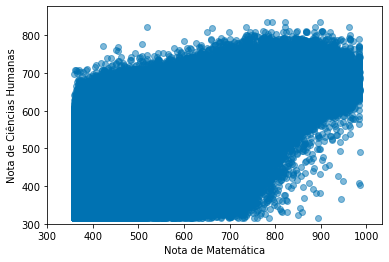

In [117]:
plt.scatter(maindata['NU_NOTA_MT'], maindata['NU_NOTA_CH'], alpha=0.5)
plt.xlim(300) #removendo as notas =0
plt.ylim(300) #removendo as notas =0
plt.xlabel("Nota de Matemática")
plt.ylabel("Nota de Ciências Humanas")
plt.show()

# Análise melhores notas de matemática do ENEM

In [7]:
#alunos que obtiveram notas acima de 800 pontos em matemática
melhoresNotas = maindata.loc[maindata['NU_NOTA_MT']>800]

In [8]:
len(melhoresNotas)

46990

In [17]:
melhoresNotas['TP_COR_RACA'].value_counts(normalize=True)

Branca      0.684337
Parda       0.221771
Amarela     0.035731
NA          0.032071
Preta       0.025495
Indígena    0.000596
Name: TP_COR_RACA, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


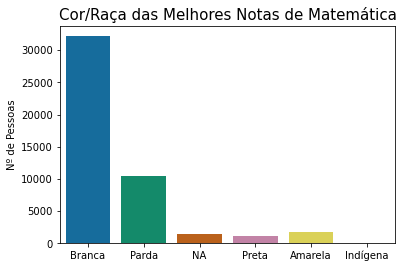

In [13]:
#Grafico quantidade de pessoas por melhores notas de matemática
sns.countplot(melhoresNotas['TP_COR_RACA'], orient='h')
plt.title('Cor/Raça das Melhores Notas de Matemática', size=15)
plt.xlabel("")
plt.ylabel("Nº de Pessoas")
plt.show()

In [18]:
melhoresNotas['Q002'].value_counts(normalize=True)

Pós-graduada        0.336157
Graduada            0.330517
Não completou ES    0.242818
Não completou EM    0.040924
Não completou EF    0.039732
Não sabe            0.008491
Nunca estudou       0.001362
Name: Q002, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


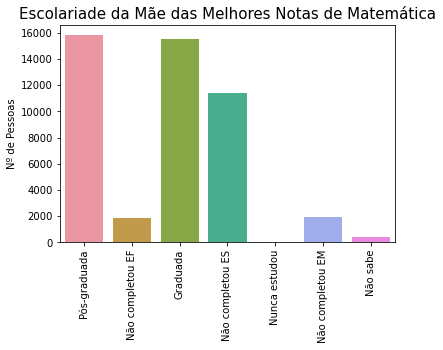

In [12]:
#Grafico Escolaridade da Mãe das Melhores Notas de Matemática
sns.countplot(melhoresNotas['Q002'], orient='h')
plt.title('Escolariade da Mãe das Melhores Notas de Matemática', size=15)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Nº de Pessoas")
plt.show()

In [19]:
melhoresNotas['TP_SEXO'].value_counts(normalize=True)

M    0.66578
F    0.33422
Name: TP_SEXO, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


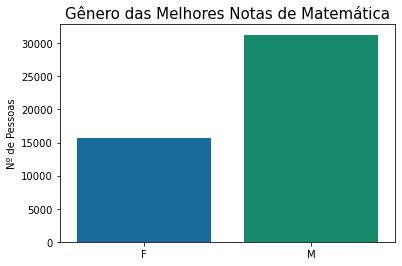

In [15]:
#Grafico Gênero das Melhores Notas de Matemática
sns.countplot(melhoresNotas['TP_SEXO'], orient='h')
plt.title('Gênero das Melhores Notas de Matemática', size=15)
plt.xlabel("")
plt.ylabel("Nº de Pessoas")
plt.show()

In [25]:
melhoresNotas['Q006'].value_counts(normalize=True)

Até 10.560        0.435582
Mais de 10.560    0.294041
Até 3.520         0.207682
Até 1.320         0.057651
Nenhuma renda     0.005044
Name: Q006, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


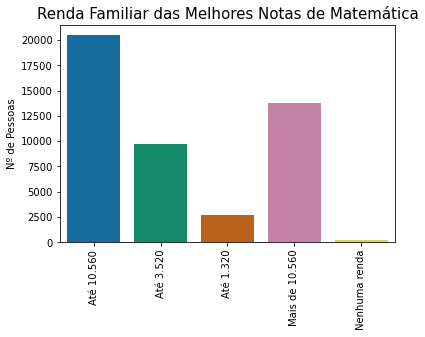

In [21]:
#Grafico Renda familiar das Melhores Notas de Matemática
sns.countplot(melhoresNotas['Q006'], orient='h')
plt.title('Renda Familiar das Melhores Notas de Matemática', size=15)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Nº de Pessoas")
plt.show()

In [24]:
melhoresNotas['Q025'].value_counts(normalize=True)

Sim    0.982401
Não    0.017599
Name: Q025, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


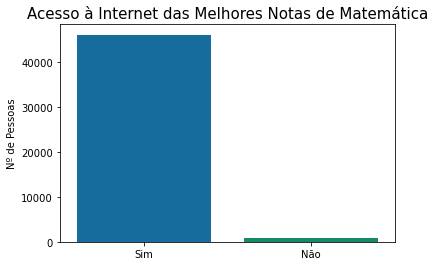

In [38]:
#Grafico Acesso à Internet das Melhores Notas de Matemática
sns.countplot(melhoresNotas['Q025'], orient='h')
plt.title('Acesso à Internet das Melhores Notas de Matemática', size=15)
plt.xlabel("")
plt.ylabel("Nº de Pessoas")
plt.show()